In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm.notebook import tqdm

In [4]:
df = pd.read_csv('../data/df_br_tokensb.csv').drop(columns = 'Unnamed: 0')
df.head(2).T

C:\Users\16156\AppData\Local\Temp\ipykernel_13928\1134384371.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_br_tokensb.csv').drop(columns = 'Unnamed: 0')


,0,1
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ
name,Tavern,Milk and Honey Nashville
address,1904 Broadway,214 11th Ave S
city,Nashville,Nashville
state,TN,TN
postal_code,37203.0,37203.0
latitude,36.1509,36.154702
longitude,-86.797012,-86.784541
overall_stars,4.0,4.0
review_count,1222,1725


In [5]:
from gensim import corpora

In [8]:
%%time
tokenized_texts = [text.split() for text in df['clean']]

CPU times: total: 2.39 s
Wall time: 2.39 s


In [9]:
%%time
mydict = corpora.Dictionary(tokenized_texts)

CPU times: total: 20.9 s
Wall time: 21 s


In [10]:
print(len(mydict.token2id))

126282


In [11]:
i = 0
# Print top 4 (word, id) tuples
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1

Word: '$', - ID: 0 
Word: 'apparent', - ID: 1 
Word: 'appetizer', - ID: 2 
Word: 'assistant', - ID: 3 


In [13]:
X=df['clean']
y= df['review_stars.1']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#?
# Train the tfidf Model 
from gensim.models import TfidfModel


# Make sure the dictionary is created from the previous block
# BOW corpus is required for tfidf model
corpus = [mydict.doc2bow(line) for line in df['clean']]

# TF-IDF Model
tfidf_model = TfidfModel(corpus)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [16]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [18]:
clf.fit(tf_x_train,y_train)

LinearSVC(random_state=0)

In [19]:
y_test_pred=clf.predict(tf_x_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.66      0.77      0.72     11478
           2       0.42      0.25      0.31      8703
           3       0.45      0.30      0.36     12243
           4       0.48      0.38      0.43     25237
           5       0.73      0.88      0.80     50037

    accuracy                           0.64    107698
   macro avg       0.55      0.52      0.52    107698
weighted avg       0.61      0.64      0.61    107698



In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')

In [25]:
clf.fit(tf_x_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [26]:
y_test_pred=clf.predict(tf_x_test)

'              precision    recall  f1-score   support\n\n           1       0.69      0.77      0.73     11478\n           2       0.45      0.32      0.37      8703\n           3       0.48      0.37      0.42     12243\n           4       0.52      0.43      0.47     25237\n           5       0.75      0.87      0.81     50037\n\n    accuracy                           0.66    107698\n   macro avg       0.58      0.55      0.56    107698\nweighted avg       0.63      0.66      0.64    107698\n'

In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73     11478
           2       0.45      0.32      0.37      8703
           3       0.48      0.37      0.42     12243
           4       0.52      0.43      0.47     25237
           5       0.75      0.87      0.81     50037

    accuracy                           0.66    107698
   macro avg       0.58      0.55      0.56    107698
weighted avg       0.63      0.66      0.64    107698



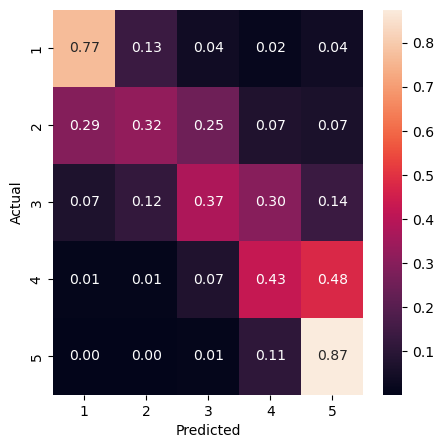

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

plt.show(block=False)

### tf-idf with ngram_range (1,2)

In [34]:
%%time

vectorizer= TfidfVectorizer(ngram_range=(1,2))
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

CPU times: total: 49 s
Wall time: 49.2 s


### Logistic Regression

In [36]:
%%time

clf = LogisticRegression(max_iter=1000,solver='saga')

clf.fit(tf_x_train,y_train)

y_test_pred=clf.predict(tf_x_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.70      0.76      0.73     11478
           2       0.47      0.31      0.38      8703
           3       0.51      0.38      0.43     12243
           4       0.53      0.46      0.49     25237
           5       0.75      0.88      0.81     50037

    accuracy                           0.67    107698
   macro avg       0.59      0.56      0.57    107698
weighted avg       0.65      0.67      0.65    107698

CPU times: total: 45.6 s
Wall time: 45.7 s


In [ ]:
%%time
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1)
lr.fit(tf_x_train,y_train)
y_test_pred=lr.predict(tf_x_test)
print(classification_report(y_test, y_test_pred))